In [1]:
import importlib.util
import numpy as np
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [3]:
lumapiFile = "C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py"
spec = importlib.util.spec_from_file_location("lumapi", lumapiFile)
lumapi = importlib.util.module_from_spec(spec)
spec.loader.exec_module(lumapi)

interApi = lumapi.INTERCONNECT(hide = False)

C:\Program Files\Lumerical\v221\api\python\lumapi.py:796: SyntaxWarning: invalid escape sequence '\s'
  message = re.sub('^(Error:)\s(prompt line)\s[0-9]+:', '', str(rvals[2])).strip()


In [4]:
interApi.expressioncheckoff()

In [5]:
um = 1e-6
nm = 1e-9
valor_lambda = 1550*nm
start_wavelenth = 1500*nm
stop_wavelenth = 1600*nm
number_point = 100000

file = 'CDWM_PDK'

In [ ]:
interApi.save(file)

In [7]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)

In [6]:
interApi.switchtolayout()

interApi.select('Acoplador_Direcional')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', 'Acoplador_Direcional')

In [8]:
interApi.connect('ONA', 'output', 'Acoplador_Direcional', 'opt_1')
interApi.connect('Acoplador_Direcional', 'opt_3', 'ONA', 'input 1')
interApi.connect('Acoplador_Direcional', 'opt_4', 'ONA', 'input 2')

1.0

In [9]:
interApi.run(1)

while True:
    FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
    FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

    wavelength_1 = np.array(FSR_1['wavelength']).flatten()
    transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

    wavelength_2 = np.array(FSR_2['wavelength']).flatten()
    transmission_2 = np.array(FSR_2["'TE' gain (dB)"])

    target_wavelength = 1550/nm

    index_1550 = np.argmin(np.abs(wavelength_2 - target_wavelength))

    print(f"Índice correspondente a {target_wavelength} nm: {index_1550}")
    print(f"Valor real encontrado: {wavelength_2[index_1550]} nm")
    print(f"Ganho correspondente: {transmission_2[index_1550]} dB")


LumApiError: 'run does not work in Analysis Mode, use switchtodesign first.'

In [ ]:
ng = 4.3458796
esp = [50/nm, 100/nm, 200/nm]

FSR = np.zeros(len(esp))

L1 = 50*um
L2 = np.zeros((len(FSR),7))

d_L = np.zeros((len(FSR),7))

for i in range (len(FSR)):
    FSR[i] = valor_lambda**2/c*esp[i]

    d_L_base = valor_lambda**2/(2*FSR[i]*ng)
    d_L_FS = valor_lambda/neff
    
    d_L_3 =  d_L_base
    d_L_2A = d_L_base/2
    d_L_2B = d_L_base/2 + 0.75*d_L_FS
    d_L_1A = d_L_base/4
    d_L_1B = d_L_base/4 + 0.250*d_L_FS
    d_L_1C = d_L_base/4 + 0.125*d_L_FS
    d_L_1D = d_L_base/4 + 0.375*d_L_FS

    d_L[i] = [d_L_3, d_L_2A, d_L_2B, d_L_1A, d_L_1B, d_L_1C, d_L_1D]

    for j in range (7):
        L2[i][j] = L1 + d_L[i][j]

    print(f'Para um espaçamento de {esp[i]*nm:.0f} GHz, FSR = {FSR[i]/nm:.2f} nm:')
    print(F'\u0394L_EST1 = {d_L[i][0]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST1-1 = {L2[i][0]/um:.2f} \u03BCm e Comprimento maior EST1-2 = {(L2[i][0]+d_L[i][0])/um:.2f} \u03BCm\n')
    print(F'\u0394L_EST2A = {d_L[i][1]/um:.2f} \u03BCm e \u0394L_EST2B = {d_L[i][2]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST2A-1 = {L2[i][1]/um:.2f} \u03BCm e Comprimento maior EST2A-2 = {(L2[i][1]+d_L[i][1])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST2B-1 = {L2[i][2]/um:.2f} \u03BCm e Comprimento maior EST2B-2 = {(L2[i][2]+d_L[i][2])/um:.2f} \u03BCm\n')
    print(F'\u0394L_EST3A = {d_L[i][3]/um:.2f} \u03BCm, \u0394L_EST3B = {d_L[i][4]/um:.2f} \u03BCm, \u0394L_EST3C = {d_L[i][5]/um:.2f} \u03BCm e \u0394L_EST3D = {d_L[i][6]/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3A-1 = {L2[i][3]/um:.2f} \u03BCm e Comprimento maior EST3A-2 = {(L2[i][3]+d_L[i][3])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3B-1 = {L2[i][4]/um:.2f} \u03BCm e Comprimento maior EST3B-2 = {(L2[i][4]+d_L[i][4])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3C-1 = {L2[i][5]/um:.2f} \u03BCm e Comprimento maior EST3C-2 = {(L2[i][5]+d_L[i][5])/um:.2f} \u03BCm')
    print(F'Comprimento maior EST3D-1 = {L2[i][6]/um:.2f} \u03BCm e Comprimento maior EST3D-2 = {(L2[i][6]+d_L[i][6])/um:.2f} \u03BCm')
    print(F'Comprimento menor = {L1/um:.2f} \u03BCm\n')

wg_width = 0.45*um
x_span_waveguide_acopla_otimizado = 10.7


ΔL = 552.82μm
Comprimento maior = 662.82μm
Comprimento menor = 110.00μm

ΔL = 55.28μm
Comprimento maior = 165.28μm
Comprimento menor = 110.00μm

ΔL = 27.64μm
Comprimento maior = 137.64μm
Comprimento menor = 110.00μm



In [ ]:
Lv = np.zeros(len(FSR))
radiu = 5*um

for i in range (len(FSR)):
    Lv[i] = (L2[i] - 4*(L1-4*radiu)/3)/2

    print(f'Comprimento horizontal = {((L1-4*radiu)/3)/um:.2f}\u03BCm\nComprimento do raio = {radiu/um:.2f}\u03BCm\nComprimento vertical = {Lv[i]/um:.2f}\u03BCm\n')

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 271.41μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 22.64μm

Comprimento horizontal = 30.00μm
Comprimento do raio = 5.00μm
Comprimento vertical = 8.82μm



In [64]:
x_ona = 0
y_ona = 0

x_waveguide_maior = 25
y_waveguide_maior = 150

x_waveguide_menor = 25
y_waveguide_menor = 300

x_y_branch = -150
y_y_branch = 225

x_acoplador_direcional = 300
y_acoplador_direcional = 225

In [65]:
interApi.switchtolayout()

interApi.select('ONA')
interApi.delete()

interApi.addelement('Optical Network Analyzer')
interApi.set('name', 'ONA')
interApi.setposition('ONA', x_ona, y_ona)
interApi.set('number of input ports', 2)
interApi.set('input parameter', 'start and stop')
interApi.set('start frequency', c/start_wavelenth)
interApi.set('stop frequency', c/stop_wavelenth)
interApi.set('number of points', number_point)

In [66]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.delete()
interApi.select('WGD_menor')
interApi.delete()

interApi.addelement('ebeam_wg_integral_1550')
interApi.set('name', 'WGD_maior')
interApi.setposition('WGD_maior', x_waveguide_maior, y_waveguide_maior)
interApi.set('wg_length', L2[2])
interApi.set('wg_width', wg_width)

interApi.addelement('ebeam_wg_integral_1550')
interApi.set('name', 'WGD_menor')
interApi.setposition('WGD_menor', x_waveguide_menor, y_waveguide_menor)
interApi.set('wg_length', L1[2])
interApi.set('wg_width', wg_width)

In [67]:
interApi.switchtolayout()

interApi.select('Y_Branch')
interApi.delete()

interApi.addelement('ebeam_y_1550')
interApi.set('name', 'Y_Branch')
interApi.setposition('Y_Branch', x_y_branch, y_y_branch)

In [68]:
interApi.switchtolayout()

interApi.select('Acoplador_Direcional')
interApi.delete()

interApi.addelement('ebeam_dc_te1550')
interApi.set('name', 'Acoplador_Direcional')
interApi.setposition('Acoplador_Direcional', x_acoplador_direcional, y_acoplador_direcional)

In [69]:
interApi.switchtolayout()

interApi.connect('ONA', 'output', 'Y_Branch', 'opt_a1')
interApi.connect('Y_Branch', 'opt_b1', 'WGD_maior', 'port 1')
interApi.connect('Y_Branch', 'opt_b2', 'WGD_menor', 'port 1')
interApi.connect('WGD_maior', 'port 2', 'Acoplador_Direcional', 'opt_1')
interApi.connect('WGD_menor', 'port 2', 'Acoplador_Direcional', 'opt_2')
interApi.connect('Acoplador_Direcional', 'opt_3', 'ONA', 'input 1')
interApi.connect('Acoplador_Direcional', 'opt_4', 'ONA', 'input 2')

1.0

In [70]:
interApi.save(file)

In [71]:
interApi.run(1)

In [72]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])  


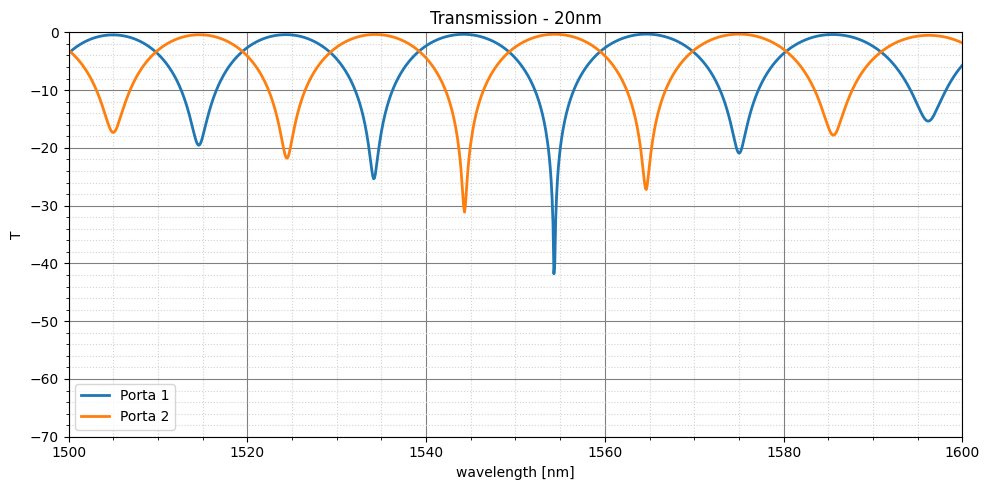

In [73]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 20nm.png')
plt.show()

In [74]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_20 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_20 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_20 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_20 = np.array(FSR_2["'TE' free spectral range (m)"])  

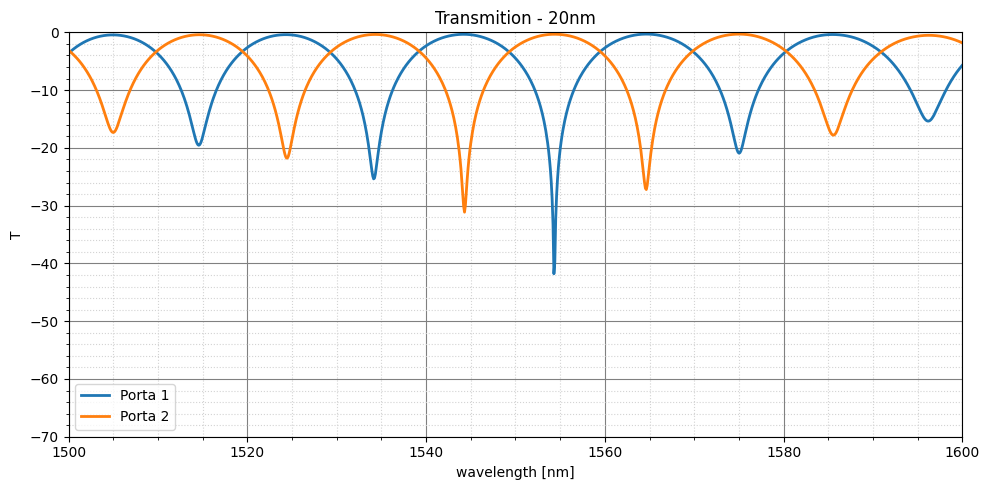

In [75]:
fig1 = plt.figure(figsize=(10,5))
ax1 = fig1.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmition - 20nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 20nm.png')
plt.show()

In [76]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('wg_length', L2[1])
interApi.select('WGD_menor')
interApi.set('wg_length', L1[1])

In [77]:
interApi.save(file)

In [78]:
interApi.run(1)

In [79]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])  

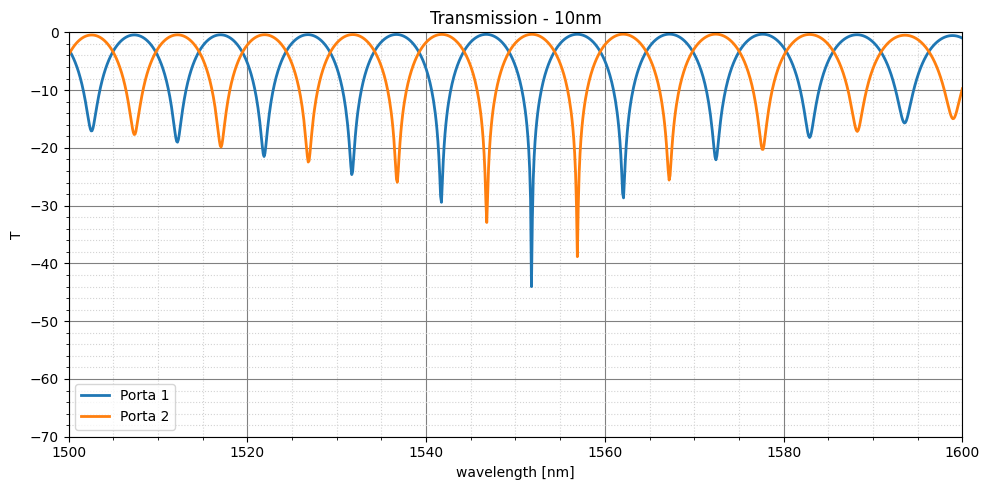

In [80]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 10nm.png')
plt.show()

In [81]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_10 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_10 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_10 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_10 = np.array(FSR_2["'TE' free spectral range (m)"])   

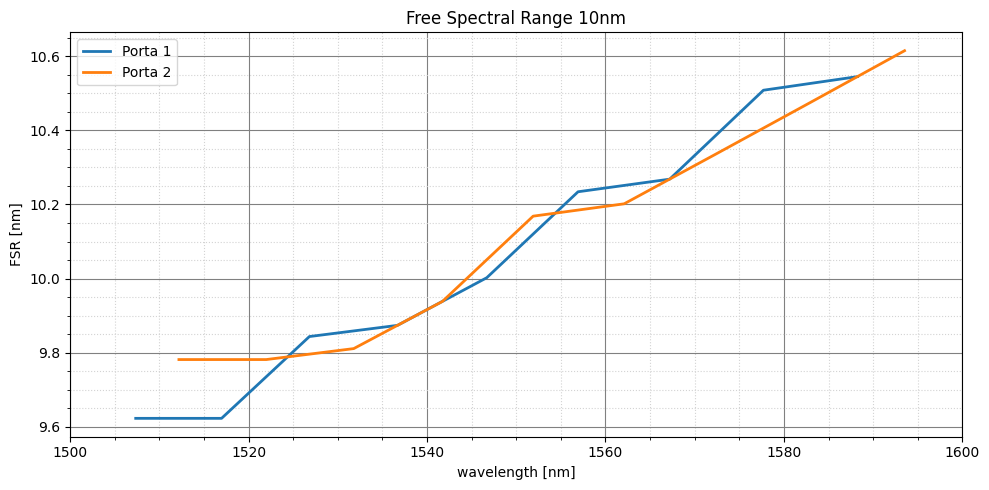

In [82]:
fig2 = plt.figure(figsize=(10,5))
ax2 = fig2.add_subplot(111)

plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range 10nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 10nm.png')
plt.show()

In [83]:
interApi.switchtolayout()

interApi.select('WGD_maior')
interApi.set('wg_length', L2[0])
interApi.select('WGD_menor')
interApi.set('wg_length', L1[0])

In [84]:
interApi.save(file)

In [85]:
interApi.run(1)

In [86]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/gain')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/gain')

wavelength_1 = np.array(FSR_1['wavelength']).flatten()
transmission_1 = np.array(FSR_1["'TE' gain (dB)"])

wavelength_2 = np.array(FSR_2['wavelength']).flatten()
transmission_2 = np.array(FSR_2["'TE' gain (dB)"])


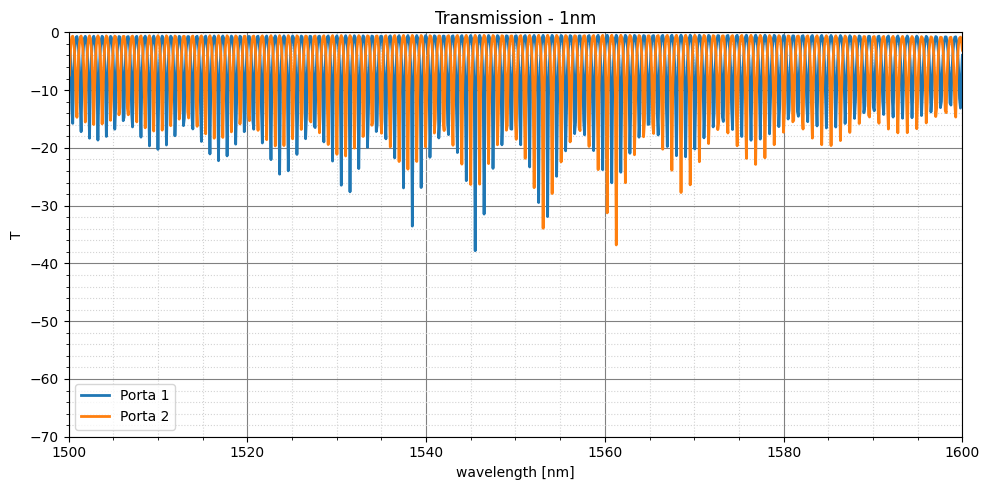

In [87]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1/nm, transmission_1, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2/nm, transmission_2, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('T')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.ylim([-70,0])
plt.title(r'Transmission - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('T - 1nm.png')
plt.show()

In [88]:
FSR_1 = interApi.getresult('ONA', 'input 1/mode 1/peak/free spectral range')
FSR_2 = interApi.getresult('ONA', 'input 2/mode 1/peak/free spectral range')

wavelength_1_1 = np.array(FSR_1['wavelength']).flatten()
fsrplot_1_1 = np.array(FSR_1["'TE' free spectral range (m)"])

wavelength_2_1 = np.array(FSR_2['wavelength']).flatten()
fsrplot_2_1 = np.array(FSR_2["'TE' free spectral range (m)"])   

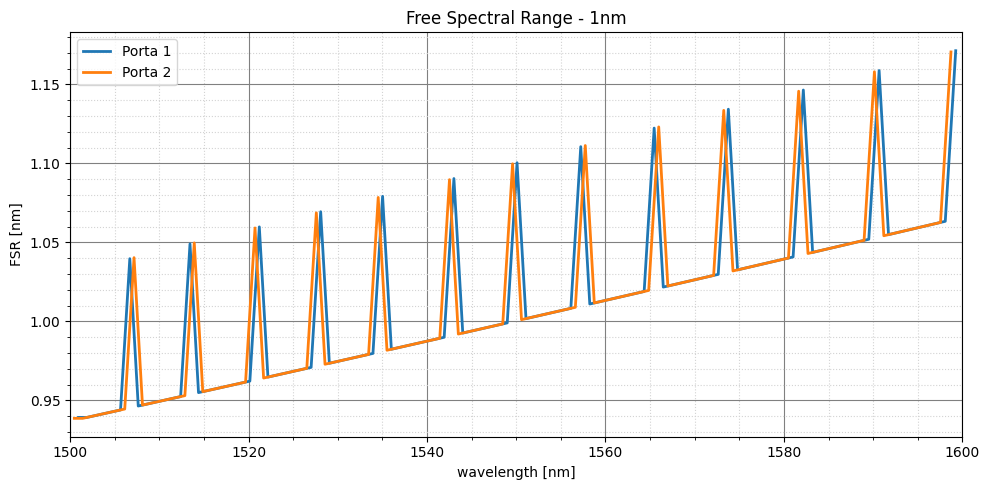

In [89]:
fig3 = plt.figure(figsize=(10,5))
ax3 = fig3.add_subplot(111)

plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2', linewidth=2)

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range - 1nm')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR - 1nm.png')
plt.show()

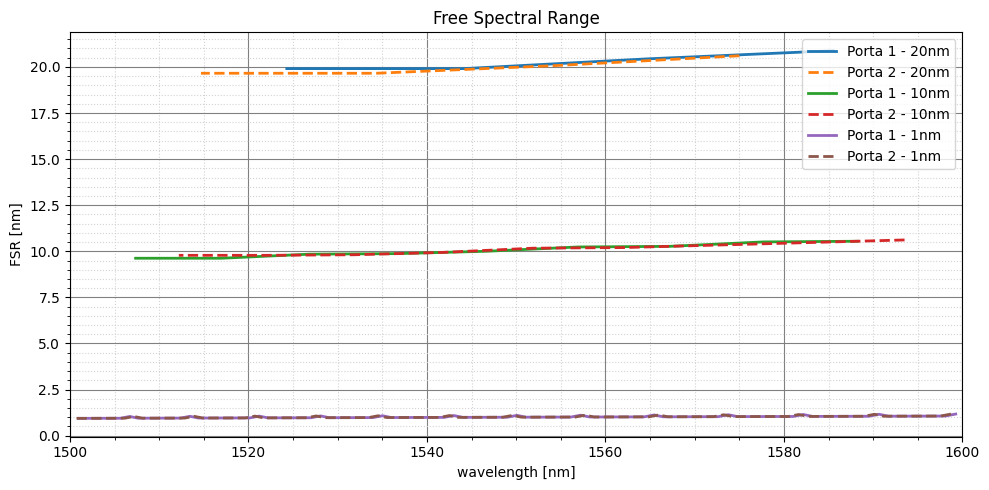

In [90]:
fig4 = plt.figure(figsize=(10,5))
ax4 = fig4.add_subplot(111)

plt.plot(wavelength_1_20/nm, fsrplot_1_20/nm, label = 'Porta 1 - 20nm', linewidth=2)
plt.plot(wavelength_2_20/nm, fsrplot_2_20/nm, label = 'Porta 2 - 20nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_10/nm, fsrplot_1_10/nm, label = 'Porta 1 - 10nm', linewidth=2)
plt.plot(wavelength_2_10/nm, fsrplot_2_10/nm, label = 'Porta 2 - 10nm', linewidth=2, linestyle='--')
plt.plot(wavelength_1_1/nm, fsrplot_1_1/nm, label = 'Porta 1 - 1nm', linewidth=2)
plt.plot(wavelength_2_1/nm, fsrplot_2_1/nm, label = 'Porta 2 - 1nm', linewidth=2, linestyle='--')

plt.axvline(x=valor_lambda, color='k', linestyle='--')

plt.xlabel(r'wavelength [nm]')
plt.ylabel('FSR [nm]')
plt.xlim([start_wavelenth/nm, stop_wavelenth/nm])
plt.title(r'Free Spectral Range')
plt.legend()
plt.grid(which='major', color='gray', linestyle='-')
plt.grid(which='minor', color='lightgray', linestyle=':')

plt.minorticks_on()

plt.tight_layout()
plt.savefig('FSR.png')
plt.show()